In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
dataset = pd.read_csv('House price.csv')

In [3]:
dataset.shape

(5000, 6)

In [28]:
dataset.head(25)

,Owner Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,556815,5.68,7,4,23087,7413234.92
1,554743,6.00,7,3,40173,10541236.37
2,429009,5.87,9,5,36882,7412915.93
3,443415,7.19,6,3,34310,8824317.67
4,419874,5.04,8,4,26354,4416604.43
5,561232,4.99,6,4,26748,7476966.49
6,452886,6.03,8,3,60828,10514390.74
7,548758,6.99,7,2,36516,11017555.92
8,419496,5.36,6,2,29387,5592086.71
9,573202,4.42,8,6,40150,10816083.67


In [4]:
dataset.describe()

,Owner Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,480081.726600,5.977278,6.988400,3.753000,36163.512200,8.624509e+06
std,74605.931109,0.991437,1.044262,1.233327,9925.651196,2.471823e+06
min,124579.000000,2.640000,3.000000,2.000000,173.000000,1.115706e+05
25%,430363.500000,5.320000,6.000000,3.000000,29404.000000,6.983040e+06
50%,481631.500000,5.970000,7.000000,4.000000,36199.000000,8.628686e+06
75%,530481.000000,6.650000,8.000000,4.000000,42861.000000,1.029847e+07
max,753914.000000,9.520000,11.000000,7.000000,69622.000000,1.728346e+07


In [5]:
dataset.isnull().any()

Owner Income          False
House Age             False
Number of Rooms       False
Number of Bedrooms    False
Area Population       False
Price                 False
dtype: bool

In [6]:
dataset.columns

Index(['Owner Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')

In [7]:
X = dataset[['Owner Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population']].values
y = dataset['Price']

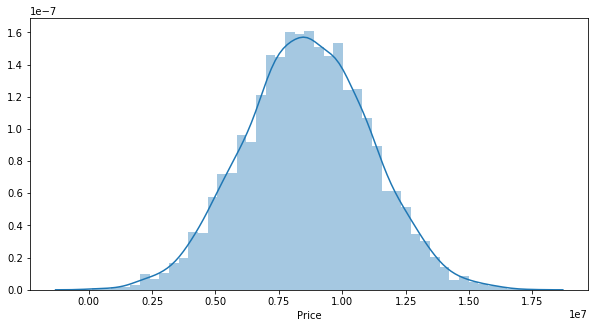

In [8]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(dataset['Price'])

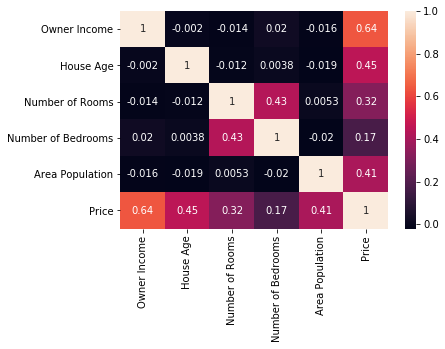

In [36]:
sns.heatmap(dataset.corr(),annot=True)

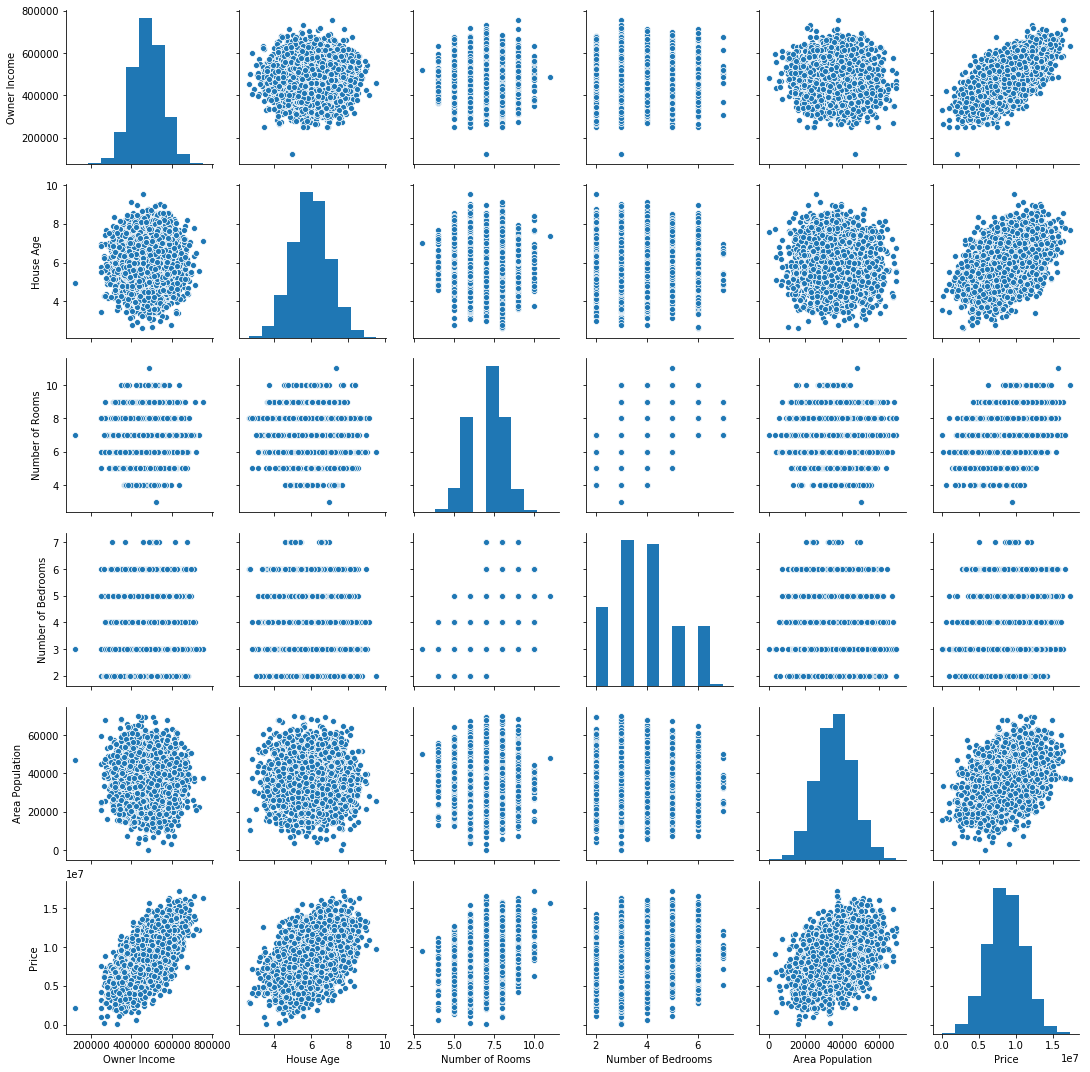

In [9]:
sns.pairplot(dataset)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
398,6259757.49,6.697035e+06
3833,6530855.52,6.683617e+06
4836,6445235.37,6.385282e+06
4572,4842984.44,3.505333e+06
636,5129132.68,5.149283e+06
2545,6616765.33,7.450378e+06
1161,4371379.32,5.363535e+06
2230,5946962.63,5.739129e+06
148,10810658.25,1.235763e+07
2530,10746837.08,1.046571e+07


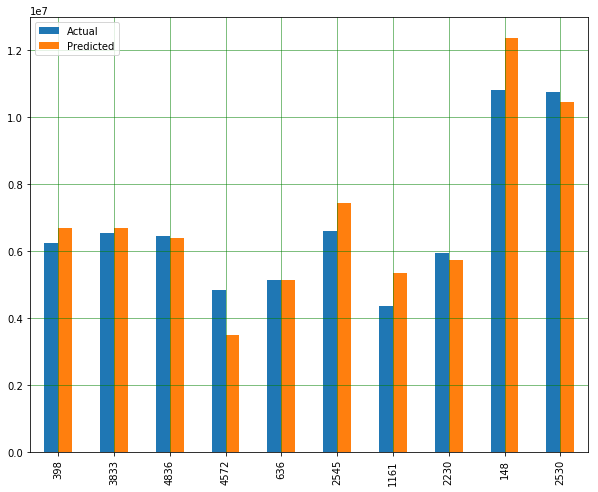

In [14]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
mean = dataset['Price'].mean()

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
rmse =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ',rmse)

Mean Absolute Error: 605936.1941698217
Mean Squared Error: 556277537809.4185
Root Mean Squared Error:  745840.1556697108


In [17]:
Error = (rmse/mean)*100

In [18]:
Error

8.647914821821473

In [19]:
Accuracy = 100-Error
print("Accuracy = ",Accuracy)

Accuracy =  91.35208517817853


In [20]:
a = regressor.coef_
b = regressor.intercept_

In [37]:
#predicting the price by giving random data
def price(income,age,rooms,bedrooms,population):
    price = a[0]*income + a[1]*age + a[2]*rooms + a[3]*bedrooms + a[4]*population + b
    return price

In [38]:
income = 567890
age = 9.6
rooms = 10
bedrooms= 4
population = 46783

In [39]:
print ("The price of the house is expected to be: ")
print (price(income,age,rooms,bedrooms,population))

The price of the house is expected to be: 
18168783.567043148
